1.- Importacion de datos y standarizacion de nombre de columnas

In [3]:
import pandas as pd 
dataset = pd.read_csv("./src/notebooks/data/ingresos-data.csv")

print (dataset.sample(frac=2/3, replace=True))

    edad  estudio  genero  tipo_trabajo  horas  ingreso
38    47        9       1             0     40        0
10    49        3       0             0     20        0
31    45        4       1             0     10        0
18    17        8       1             0     15        0
81    34       10       0             1     72        0
..   ...      ...     ...           ...    ...      ...
66    21        9       0             0     40        0
88    24        3       1             0     60        0
21    25       10       1             1     40        0
55    30       10       0             0     40        0
77    19        5       1             0     40        0

[67 rows x 6 columns]


Analisis de la columna Profit, con respecto a la frecuencia de datos

<Axes: >

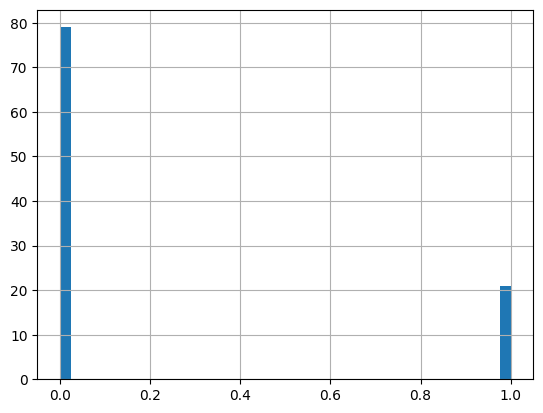

In [4]:
dataset.ingreso.hist(bins=40)

In [11]:
from random import sample
print(dataset.columns[:-1], "\n")
personas_filtradas = dataset.columns[:-1]
ingreso_columna = dataset['ingreso']
print(dataset.drop(columns=['ingreso']).sample(n=3, axis=1))


Index(['edad', 'estudio', 'genero', 'tipo_trabajo', 'horas'], dtype='object') 

    estudio  genero  tipo_trabajo
0         9       0             0
1         9       0             0
2         8       0             0
3        13       0             0
4         4       1             0
..      ...     ...           ...
95       13       1             0
96       10       0             0
97        3       0             0
98        9       1             0
99        9       1             0

[100 rows x 3 columns]


Ajsutar la regresion con el data set

In [23]:
from sklearn.ensemble import RandomForestClassifier
bosque = RandomForestClassifier(n_estimators = 100, criterion="gini",max_features="sqrt",
                                bootstrap=True, max_samples = 2/3, oob_score = True) 
columnas = dataset.columns[:-1]
bosque.fit(dataset[dataset.columns[:-1]], dataset["ingreso"])             
#bosque.fit(x, y)                                

RandomForestClassifier(max_samples=0.6666666666666666, oob_score=True)

0     27
1     30
2     34
3     26
4     23
      ..
95    32
96    20
97    46
98    37
99    47
Name: edad, Length: 100, dtype: int64
0     0
1     0
2     0
3     0
4     0
     ..
95    1
96    0
97    0
98    0
99    0
Name: ingreso, Length: 100, dtype: int64


/home/eyacelga/.virtualenvs/ai-proyecto-local/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


ValueError: Expected a 2-dimensional container but got <class 'pandas.core.series.Series'> instead. Pass a DataFrame containing a single row (i.e. single sample) or a single column (i.e. single feature) instead.

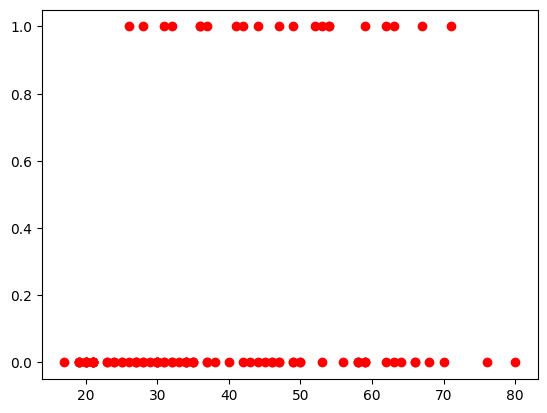

In [25]:
#import numpy as np
#import matplotlib.pyplot as plt

#x = dataset[dataset.columns[:-1]];
#y = dataset["ingreso"];

#print(x)
#print(y)

#x_grid = np.arange(min(x),max(x),0.1)
#x_grid = x_grid.reshape(len(x_grid),1)
#plt.scatter(x, y, color="red")
#plt.plot(x_grid, regression.predict(x_grid), color="blue")
#plt.plot(x, bosque.predict(x), color="blue")
#plt.title("Sueldo vs Años de experiencia (Conjunto de datos de TESTING)")
#plt.xlabel("Años de experiencia")
#plt.ylabel("Sueldo (en $)")
#plt.show()